# DA 320

| Key | Value |
|:------------- |:-------------|
| Assignment | A3 - Jupyter Charts |
| Author | Junguk Park |
| Date | 2022-04-29 |


> ## Introduction
> - Datasets : imdb_superhero.csv and metacritic_movies.csv 
> - Datasets contain informations about the movies (title, release year, score, and etc.)
> - Rander some charts about movie rating trend, release month, budget, and gross sales
> - boxplot, histogram, and scatterplot

Importing CSV files in Pandas

In [149]:
# open and read file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
sns.set(rc={"figure.figsize":(16, 9)})

df1 = pd.read_csv("./imdb_superhero.csv")
df2 = pd.read_csv("./metacritic_movies.csv")

print(df1.shape)
print(df2.shape)

(484, 38)
(10828, 6)


In [150]:
df1.head()

,ID,Title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,Budget,...,Producer1,Producer2,Producer3,Producer4,Producer5,Company1,Company2,Company3,Company4,Company5
0,6320628,Spider-Man: Far from Home,129.0,7.7,200908.0,PG-13,2019,6,26,160000000.0,...,Victoria Alonso,Avi Arad,Chris Buongiorno,Eric Hauserman Carroll,Louis D'Esposito,Columbia Pictures,Pascal Pictures,Marvel Studios,NaN,NaN
1,4154796,Avengers: Endgame,181.0,8.6,569782.0,PG-13,2019,4,22,356000000.0,...,Victoria Alonso,Mitchell Bell,Ari Costa,Louis D'Esposito,Jon Favreau,Marvel Studios,NaN,NaN,NaN,NaN
2,6565702,Dark Phoenix,113.0,5.8,96585.0,PG-13,2019,6,5,200000000.0,...,Daniel Auclair,Todd Hallowell,Justin Haut,Simon Kinberg,Stan Lee,Twentieth Century Fox,Bad Hat Harry Productions,Donners' Company,Kinberg Genre,Marvel Entertainment
3,468569,The Dark Knight,152.0,9.0,2105721.0,TV-14::(LV),2008,7,14,185000000.0,...,Kevin De La Noy,Jordan Goldberg,Philip Lee,Benjamin Melniker,Christopher Nolan,Warner Bros.,Legendary Entertainment,Syncopy,DC Comics,NaN
4,1477834,Aquaman,143.0,7.0,300580.0,PG-13,2018,11,26,160000000.0,...,Khadija Alami,Jon Berg,Rob Cowan,Walter Hamada,Geoff Johns,DC Comics,DC Entertainment,Panoramic Pictures,Rodeo FX,The Safran Company


In [151]:
df2.head()

,movie_id,title,release_date,description,score,thumbnail
0,11234,"Crouching Tiger, Hidden Dragon","December 8, 2000","In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...
1,11235,Yi Yi,"October 6, 2000",This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...
2,11236,Beau Travail,"March 31, 2000",The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...
3,11237,Almost Famous,"September 13, 2000","In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...
4,11238,Chicken Run,"June 21, 2000",A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...


Before joining two data, check common column

In [152]:
df1[df1['Title'] == 'Spider-Man: Far from Home']

,ID,Title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,Budget,...,Producer1,Producer2,Producer3,Producer4,Producer5,Company1,Company2,Company3,Company4,Company5
0,6320628,Spider-Man: Far from Home,129.0,7.7,200908.0,PG-13,2019,6,26,160000000.0,...,Victoria Alonso,Avi Arad,Chris Buongiorno,Eric Hauserman Carroll,Louis D'Esposito,Columbia Pictures,Pascal Pictures,Marvel Studios,NaN,NaN


In [153]:
df2[df2['title'] == 'Spider-Man: Far from Home']

,movie_id,title,release_date,description,score,thumbnail
9927,21161,Spider-Man: Far from Home,"July 2, 2019",Our friendly neighborhood Super Hero decides t...,69,https://static.metacritic.com/images/products/...


df1.movie_id and df2.ID are not matched. df1.Title and df2.title are matched. rename column from 'Title' to 'title' 

In [154]:
df1 = df1.rename(columns={"Title": "title"})
df1

,ID,title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,Budget,...,Producer1,Producer2,Producer3,Producer4,Producer5,Company1,Company2,Company3,Company4,Company5
0,6320628,Spider-Man: Far from Home,129.0,7.7,200908.0,PG-13,2019,6,26,160000000.0,...,Victoria Alonso,Avi Arad,Chris Buongiorno,Eric Hauserman Carroll,Louis D'Esposito,Columbia Pictures,Pascal Pictures,Marvel Studios,NaN,NaN
1,4154796,Avengers: Endgame,181.0,8.6,569782.0,PG-13,2019,4,22,356000000.0,...,Victoria Alonso,Mitchell Bell,Ari Costa,Louis D'Esposito,Jon Favreau,Marvel Studios,NaN,NaN,NaN,NaN
2,6565702,Dark Phoenix,113.0,5.8,96585.0,PG-13,2019,6,5,200000000.0,...,Daniel Auclair,Todd Hallowell,Justin Haut,Simon Kinberg,Stan Lee,Twentieth Century Fox,Bad Hat Harry Productions,Donners' Company,Kinberg Genre,Marvel Entertainment
3,468569,The Dark Knight,152.0,9.0,2105721.0,TV-14::(LV),2008,7,14,185000000.0,...,Kevin De La Noy,Jordan Goldberg,Philip Lee,Benjamin Melniker,Christopher Nolan,Warner Bros.,Legendary Entertainment,Syncopy,DC Comics,NaN
4,1477834,Aquaman,143.0,7.0,300580.0,PG-13,2018,11,26,160000000.0,...,Khadija Alami,Jon Berg,Rob Cowan,Walter Hamada,Geoff Johns,DC Comics,DC Entertainment,Panoramic Pictures,Rodeo FX,The Safran Company
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,1396235,Catalina: A New Kind of Superhero,98.0,3.0,14.0,Not Rated,2009,1,5,1700.0,...,Kenneth D. Barker,NaN,NaN,NaN,NaN,Water on the Rock,NaN,NaN,NaN,NaN
480,2597794,ACT Honour Walk,50.0,NaN,NaN,NaN,2013,1,1,NaN,...,Wendell Charles NeSmith,NaN,NaN,NaN,NaN,Open Source University,NaN,NaN,NaN,NaN
481,4306404,Oigye Eseo on Ulemae 9: Mujeok Ui Paiteo Ulemae,NaN,NaN,NaN,NaN,1993,10,6,NaN,...,Cheong-gi Kim,NaN,NaN,NaN,NaN,Seoul Donghwa,NaN,NaN,NaN,NaN
482,5737002,Translyatsia Safronova: Pro Konstruktory,65.0,1.2,12.0,NaN,2015,8,19,NaN,...,Andrey Boyko,Konstantin Safronov,NaN,NaN,NaN,Obzory igrushek Tovarisch Safronov,Obzor konstruktora,NaN,NaN,NaN


Transforming data in Pandas

In [155]:
# convert date strings into real date values

df2.release_date = pd.to_datetime(df2.release_date)
df2['year'] = df2.release_date.dt.year
# df2['year'] = df['year'].astype(int)
df2['month'] = df2.release_date.dt.month
# df2['month'] = df2['month'].astype(int)
df2.head()

,movie_id,title,release_date,description,score,thumbnail,year,month
0,11234,"Crouching Tiger, Hidden Dragon",2000-12-08,"In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...,2000,12
1,11235,Yi Yi,2000-10-06,This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...,2000,10
2,11236,Beau Travail,2000-03-31,The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...,2000,3
3,11237,Almost Famous,2000-09-13,"In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...,2000,9
4,11238,Chicken Run,2000-06-21,A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...,2000,6


Join `imdb_superhero.csv` and `metacritic_movies.csv`

In [156]:
df = pd.merge(df1,df2,on='title',how='outer')
df.head()

,ID,title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,Budget,...,Company3,Company4,Company5,movie_id,release_date,description,score,thumbnail,year,month
0,6320628.0,Spider-Man: Far from Home,129.0,7.7,200908.0,PG-13,2019.0,6.0,26.0,160000000.0,...,Marvel Studios,NaN,NaN,21161.0,2019-07-02,Our friendly neighborhood Super Hero decides t...,69.0,https://static.metacritic.com/images/products/...,2019.0,7.0
1,4154796.0,Avengers: Endgame,181.0,8.6,569782.0,PG-13,2019.0,4.0,22.0,356000000.0,...,NaN,NaN,NaN,21051.0,2019-04-26,The grave course of events set in motion by Th...,78.0,https://static.metacritic.com/images/products/...,2019.0,4.0
2,6565702.0,Dark Phoenix,113.0,5.8,96585.0,PG-13,2019.0,6.0,5.0,200000000.0,...,Donners' Company,Kinberg Genre,Marvel Entertainment,21448.0,2019-06-07,"In Dark Phoenix, the X-Men face their most for...",43.0,https://static.metacritic.com/images/products/...,2019.0,6.0
3,468569.0,The Dark Knight,152.0,9.0,2105721.0,TV-14::(LV),2008.0,7.0,14.0,185000000.0,...,Syncopy,DC Comics,NaN,14821.0,2008-07-18,Batman raises the stakes in his war on crime. ...,84.0,https://static.metacritic.com/images/products/...,2008.0,7.0
4,1477834.0,Aquaman,143.0,7.0,300580.0,PG-13,2018.0,11.0,26.0,160000000.0,...,Panoramic Pictures,Rodeo FX,The Safran Company,20762.0,2018-12-21,Aquaman reveals the origin story of half-human...,55.0,https://static.metacritic.com/images/products/...,2018.0,12.0


Data cleaning

In [157]:
# Drop columns
dropCols = ["ID",
            "ReleaseYear",
            "ReleaseMonth",
            "movie_id",
            "release_date",
            "description",
            "thumbnail"
           ]

df = df.drop(dropCols, axis=1)

In [158]:
# check NaN
df.dropna()
# too many NaN

,title,Runtime,Rating,Votes,MPAARating,ReleaseDay,Budget,OpeningWeekend,GrossSales,Genres,...,Producer4,Producer5,Company1,Company2,Company3,Company4,Company5,score,year,month


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11169 entries, 0 to 11168
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           11169 non-null  object 
 1   Runtime         455 non-null    float64
 2   Rating          466 non-null    float64
 3   Votes           466 non-null    float64
 4   MPAARating      324 non-null    object 
 5   ReleaseDay      491 non-null    float64
 6   Budget          290 non-null    float64
 7   OpeningWeekend  172 non-null    float64
 8   GrossSales      154 non-null    float64
 9   Genres          491 non-null    object 
 10  Cast1           491 non-null    object 
 11  Cast2           491 non-null    object 
 12  Cast3           483 non-null    object 
 13  Cast4           479 non-null    object 
 14  Cast5           474 non-null    object 
 15  Cast6           470 non-null    object 
 16  Cast7           465 non-null    object 
 17  Cast8           463 non-null   

In [160]:
df

,title,Runtime,Rating,Votes,MPAARating,ReleaseDay,Budget,OpeningWeekend,GrossSales,Genres,...,Producer4,Producer5,Company1,Company2,Company3,Company4,Company5,score,year,month
0,Spider-Man: Far from Home,129.0,7.7,200908.0,PG-13,26.0,160000000.0,92579212.0,1.096950e+09,"Action, Adventure, Sci-Fi",...,Eric Hauserman Carroll,Louis D'Esposito,Columbia Pictures,Pascal Pictures,Marvel Studios,NaN,NaN,69.0,2019.0,7.0
1,Avengers: Endgame,181.0,8.6,569782.0,PG-13,22.0,356000000.0,357115007.0,2.796274e+09,"Action, Adventure, Sci-Fi",...,Louis D'Esposito,Jon Favreau,Marvel Studios,NaN,NaN,NaN,NaN,78.0,2019.0,4.0
2,Dark Phoenix,113.0,5.8,96585.0,PG-13,5.0,200000000.0,32828348.0,2.524430e+08,"Action, Adventure, Sci-Fi",...,Simon Kinberg,Stan Lee,Twentieth Century Fox,Bad Hat Harry Productions,Donners' Company,Kinberg Genre,Marvel Entertainment,43.0,2019.0,6.0
3,The Dark Knight,152.0,9.0,2105721.0,TV-14::(LV),14.0,185000000.0,158411483.0,1.004558e+09,"Action, Crime, Drama, Thriller",...,Benjamin Melniker,Christopher Nolan,Warner Bros.,Legendary Entertainment,Syncopy,DC Comics,NaN,84.0,2008.0,7.0
4,Aquaman,143.0,7.0,300580.0,PG-13,26.0,160000000.0,72573522.0,1.147962e+09,"Action, Adventure, Fantasy, Sci-Fi",...,Walter Hamada,Geoff Johns,DC Comics,DC Entertainment,Panoramic Pictures,Rodeo FX,The Safran Company,55.0,2018.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11164,The Tax Collector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,2020.0,8.0
11165,Blumhouse's Fantasy Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,2020.0,2.0
11166,The Last Days of American Crime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,2020.0,6.0
11167,"Love, Weddings & Other Disasters",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2020.0,12.0


Replace `NaN` to `'NA'` string for columns, Cast, Director, Producer and Company

In [161]:
cols = ["Cast1",
        "Cast2", 
        "Cast3", 
        "Cast4", 
        "Cast5", 
        "Cast6", 
        "Cast7", 
        "Cast8", 
        "Cast9", 
        "Cast10", 
        "Director1",
        "Director2",
        "Director3",
        "Director4",
        "Director5",
        "Producer1",
        "Producer2",
        "Producer3",
        "Producer4",
        "Producer5",
        "Company1",
        "Company2",
        "Company3",
        "Company4",
        "Company5"
       ]

for col in cols:
    df[col].fillna('NA', inplace=True)

df    


,title,Runtime,Rating,Votes,MPAARating,ReleaseDay,Budget,OpeningWeekend,GrossSales,Genres,...,Producer4,Producer5,Company1,Company2,Company3,Company4,Company5,score,year,month
0,Spider-Man: Far from Home,129.0,7.7,200908.0,PG-13,26.0,160000000.0,92579212.0,1.096950e+09,"Action, Adventure, Sci-Fi",...,Eric Hauserman Carroll,Louis D'Esposito,Columbia Pictures,Pascal Pictures,Marvel Studios,NA,NA,69.0,2019.0,7.0
1,Avengers: Endgame,181.0,8.6,569782.0,PG-13,22.0,356000000.0,357115007.0,2.796274e+09,"Action, Adventure, Sci-Fi",...,Louis D'Esposito,Jon Favreau,Marvel Studios,NA,NA,NA,NA,78.0,2019.0,4.0
2,Dark Phoenix,113.0,5.8,96585.0,PG-13,5.0,200000000.0,32828348.0,2.524430e+08,"Action, Adventure, Sci-Fi",...,Simon Kinberg,Stan Lee,Twentieth Century Fox,Bad Hat Harry Productions,Donners' Company,Kinberg Genre,Marvel Entertainment,43.0,2019.0,6.0
3,The Dark Knight,152.0,9.0,2105721.0,TV-14::(LV),14.0,185000000.0,158411483.0,1.004558e+09,"Action, Crime, Drama, Thriller",...,Benjamin Melniker,Christopher Nolan,Warner Bros.,Legendary Entertainment,Syncopy,DC Comics,NA,84.0,2008.0,7.0
4,Aquaman,143.0,7.0,300580.0,PG-13,26.0,160000000.0,72573522.0,1.147962e+09,"Action, Adventure, Fantasy, Sci-Fi",...,Walter Hamada,Geoff Johns,DC Comics,DC Entertainment,Panoramic Pictures,Rodeo FX,The Safran Company,55.0,2018.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11164,The Tax Collector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NA,NA,NA,NA,NA,NA,NA,22.0,2020.0,8.0
11165,Blumhouse's Fantasy Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NA,NA,NA,NA,NA,NA,NA,22.0,2020.0,2.0
11166,The Last Days of American Crime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NA,NA,NA,NA,NA,NA,NA,15.0,2020.0,6.0
11167,"Love, Weddings & Other Disasters",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NA,NA,NA,NA,NA,NA,NA,11.0,2020.0,12.0


## Basic research project on the movie data set

Exploratory Data Analysis

### Q. Does 'Rating' follow a normal distribution?

<AxesSubplot:xlabel='Rating', ylabel='Count'>

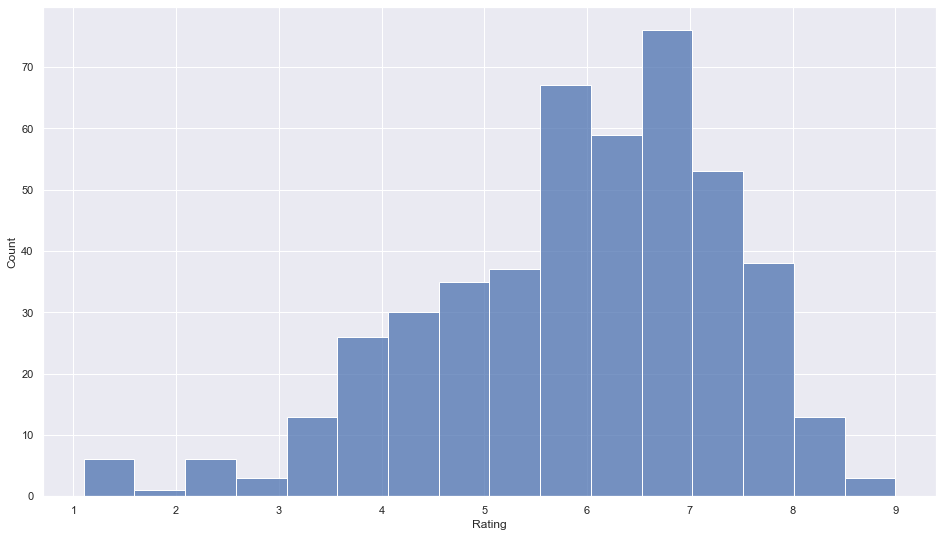

In [162]:
sns.histplot(data=df, x="Rating")

- Left skewed - generous rating
- The highest rating 9.0 The lowest rating 1.1
- No description of rating range such as 0-10
- Mode rating 6.7 and 6.8


### Q. Check the `OpeningWeekend` trend

<AxesSubplot:xlabel='OpeningWeekend', ylabel='Count'>

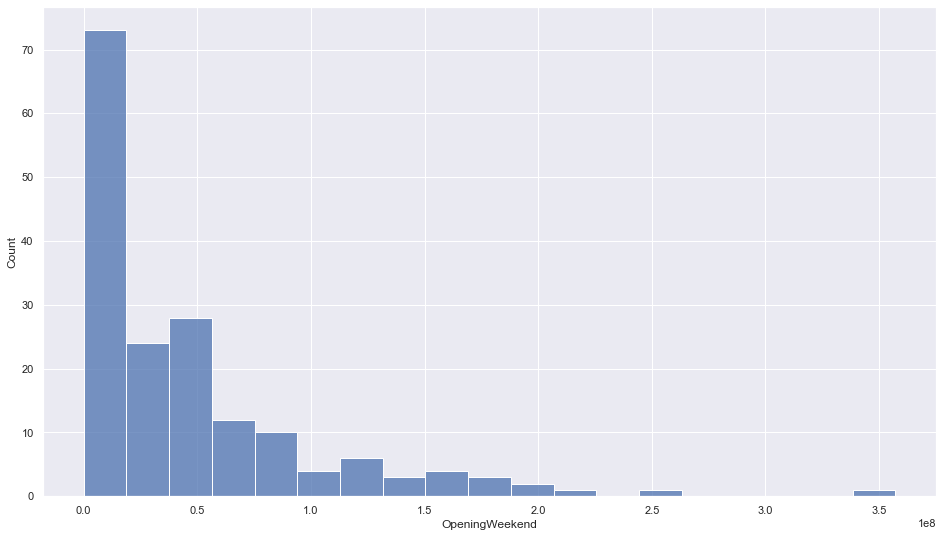

In [163]:
sns.histplot(data=df, x="OpeningWeekend")

- Declining
- Most movies were not watched by a large audience in the opening weekend
- few movies got a large audience in the opening weekend (Marvel Studios)


In [164]:
df[df["OpeningWeekend"]>200000000]

,title,Runtime,Rating,Votes,MPAARating,ReleaseDay,Budget,OpeningWeekend,GrossSales,Genres,...,Producer4,Producer5,Company1,Company2,Company3,Company4,Company5,score,year,month
1,Avengers: Endgame,181.0,8.6,569782.0,PG-13,22.0,356000000.0,357115007.0,2.796274e+09,"Action, Adventure, Sci-Fi",...,Louis D'Esposito,Jon Favreau,Marvel Studios,NA,NA,NA,NA,78.0,2019.0,4.0
9,Avengers: Infinity War,149.0,8.5,712222.0,PG-13,23.0,321000000.0,257698183.0,2.048710e+09,"Action, Adventure, Sci-Fi",...,Louis D'Esposito,Jon Favreau,Marvel Studios,Jason Roberts Productions,South Pictures,NA,NA,68.0,2018.0,4.0
23,Black Panther,134.0,7.3,543390.0,PG-13,29.0,200000000.0,202003951.0,1.347071e+09,"Action, Adventure, Sci-Fi",...,Kevin Feige,David J. Grant,Marvel Studios,Walt Disney Pictures,NA,NA,NA,88.0,2018.0,2.0
36,The Avengers,143.0,8.0,1201420.0,TV-14::(LV),11.0,220000000.0,207438708.0,1.519558e+09,"Action, Adventure, Sci-Fi",...,Kevin Feige,Alan Fine,Marvel Studios,Paramount Pictures,NA,NA,NA,69.0,2012.0,5.0


In [165]:
df.groupby(['Genres']).count()['title']
# sns.histplot(data=df.groupby(['Genres']).count()['title'])

Genres
Action                                              17
Action, Adventure                                    4
Action, Adventure, Biography, Drama                  1
Action, Adventure, Comedy, Crime                     1
Action, Adventure, Comedy, Crime, Family, Sci-Fi     1
                                                    ..
Sci-Fi, Family, Action                               7
Sci-Fi, Thriller                                     1
Sport                                                1
Talk-Show                                            1
Thriller                                             1
Name: title, Length: 221, dtype: int64

- Too granular classification for Genres. It was not easy to use.

### Q. How many hero movies were released in each month?

<AxesSubplot:xlabel='ReleaseMonth', ylabel='Count'>

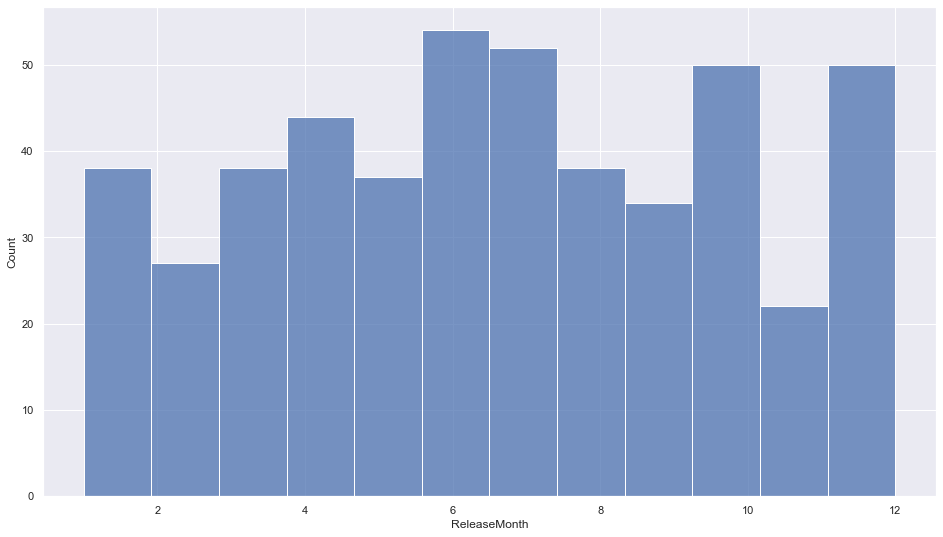

In [166]:
sns.histplot(data=df1, x="ReleaseMonth", bins=12)

### Q. How many movies were release in each month?

<AxesSubplot:xlabel='ReleaseMonth', ylabel='Count'>

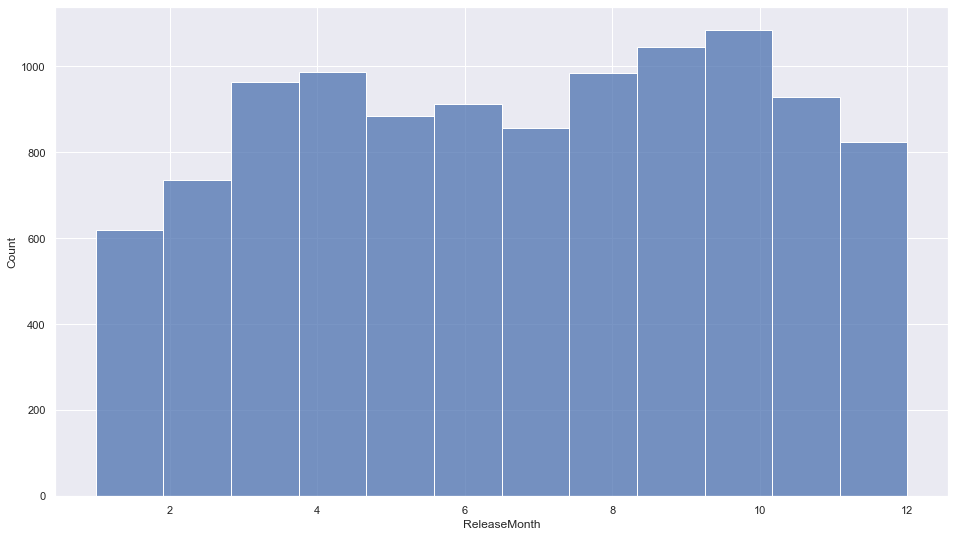

In [167]:
df2['ReleaseMonth'] = df2.release_date.dt.month
sns.histplot(data=df2, x="ReleaseMonth", bins=12)

- Hero movies were released mainly in June, July, October, and December
- Overall movies were released mainly in March, April, September, and October

### Q. Need more budget for longer movie runtime?

<AxesSubplot:xlabel='Runtime', ylabel='Budget'>

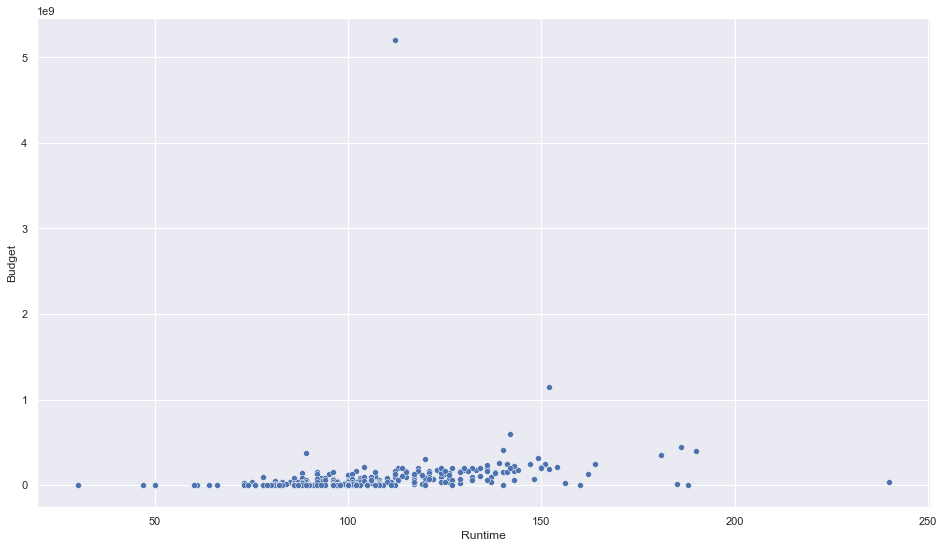

In [171]:
sns.scatterplot(x="Runtime", y="Budget", data=df)

- Runtime and Budget did not associate

### Q. More budget more success?

<AxesSubplot:xlabel='Budget', ylabel='GrossSales'>

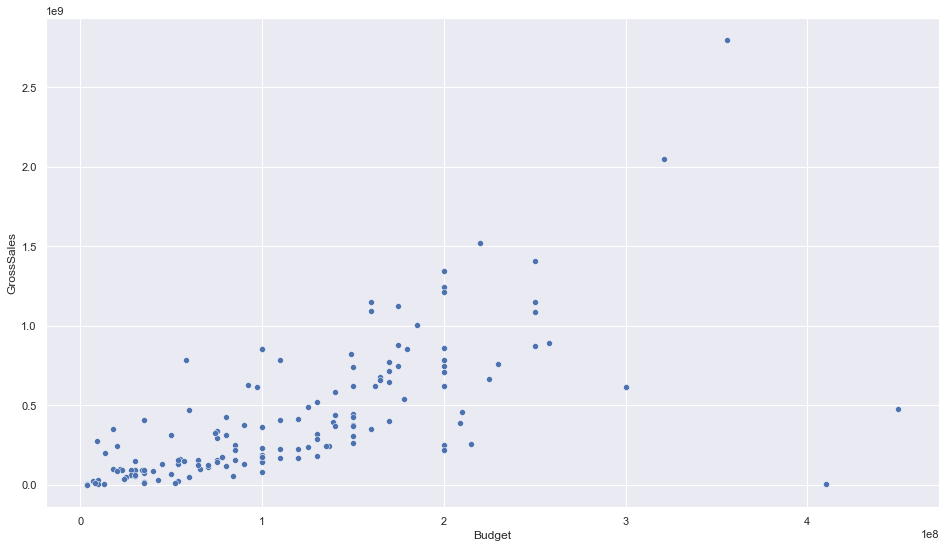

In [172]:
sns.scatterplot(x="Budget", y="GrossSales", data=df)

- Budget and Grossales had positive relation(looks like a curve)

### Q. Score and Rating relation with GrossSales?

<AxesSubplot:xlabel='Rating', ylabel='score'>

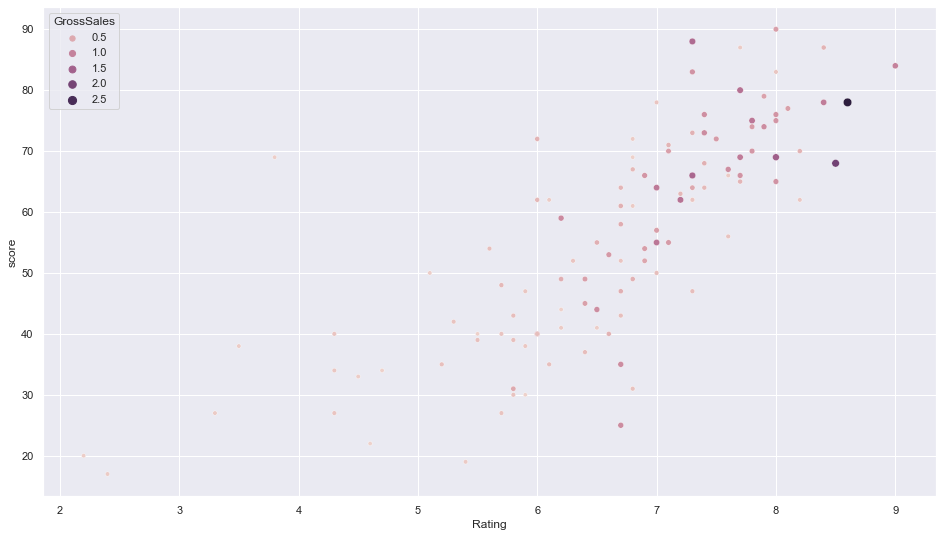

In [173]:
# Score and Rating corelation?
sns.scatterplot(data=df, x="Rating", y="score",  hue="GrossSales", size="GrossSales")

- Score and Rating are linear. 
- Higher Score and Rating, higher GrossSales

### Q. Score and Rating relation with OpeningWeekend?

<AxesSubplot:xlabel='Rating', ylabel='score'>

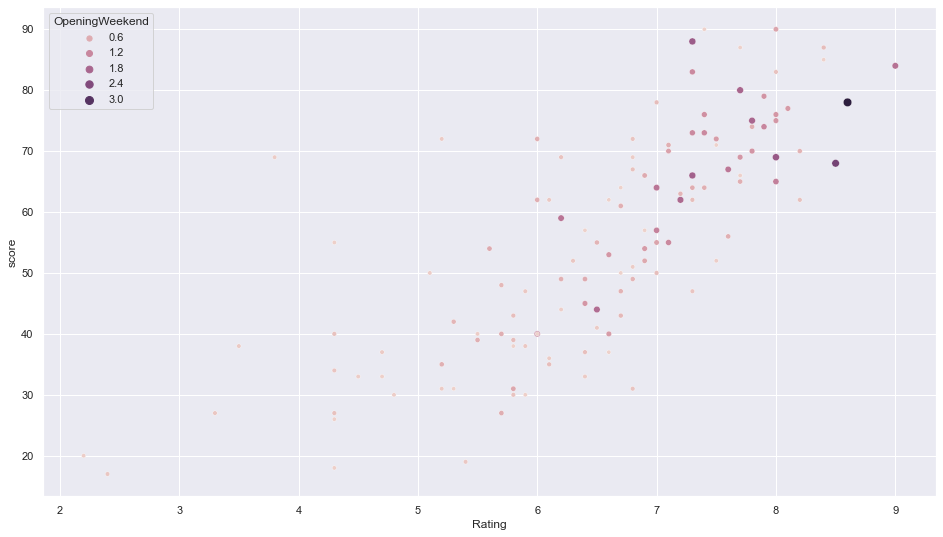

In [174]:
sns.scatterplot(data=df, x="Rating", y="score", size="OpeningWeekend", hue="OpeningWeekend")

- Higher Score and Rating, higher OpeningWeekend

### Q. How importnat is the opening week to a movie?

<AxesSubplot:xlabel='OpeningWeekend', ylabel='GrossSales'>

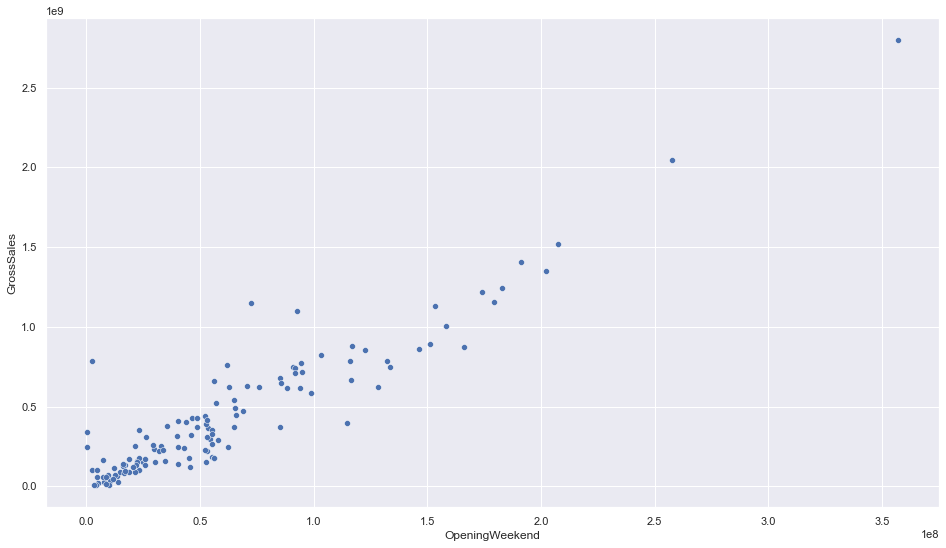

In [168]:
sns.scatterplot(x="OpeningWeekend", y="GrossSales", data=df)

- OpeningWeekend and GrossSales had positive linear relation.

### Extra fun facts
- Hero movie production status by company

In [176]:
sns.set(rc={"figure.figsize":(32, 18)})

<AxesSubplot:xlabel='Name', ylabel='producing'>

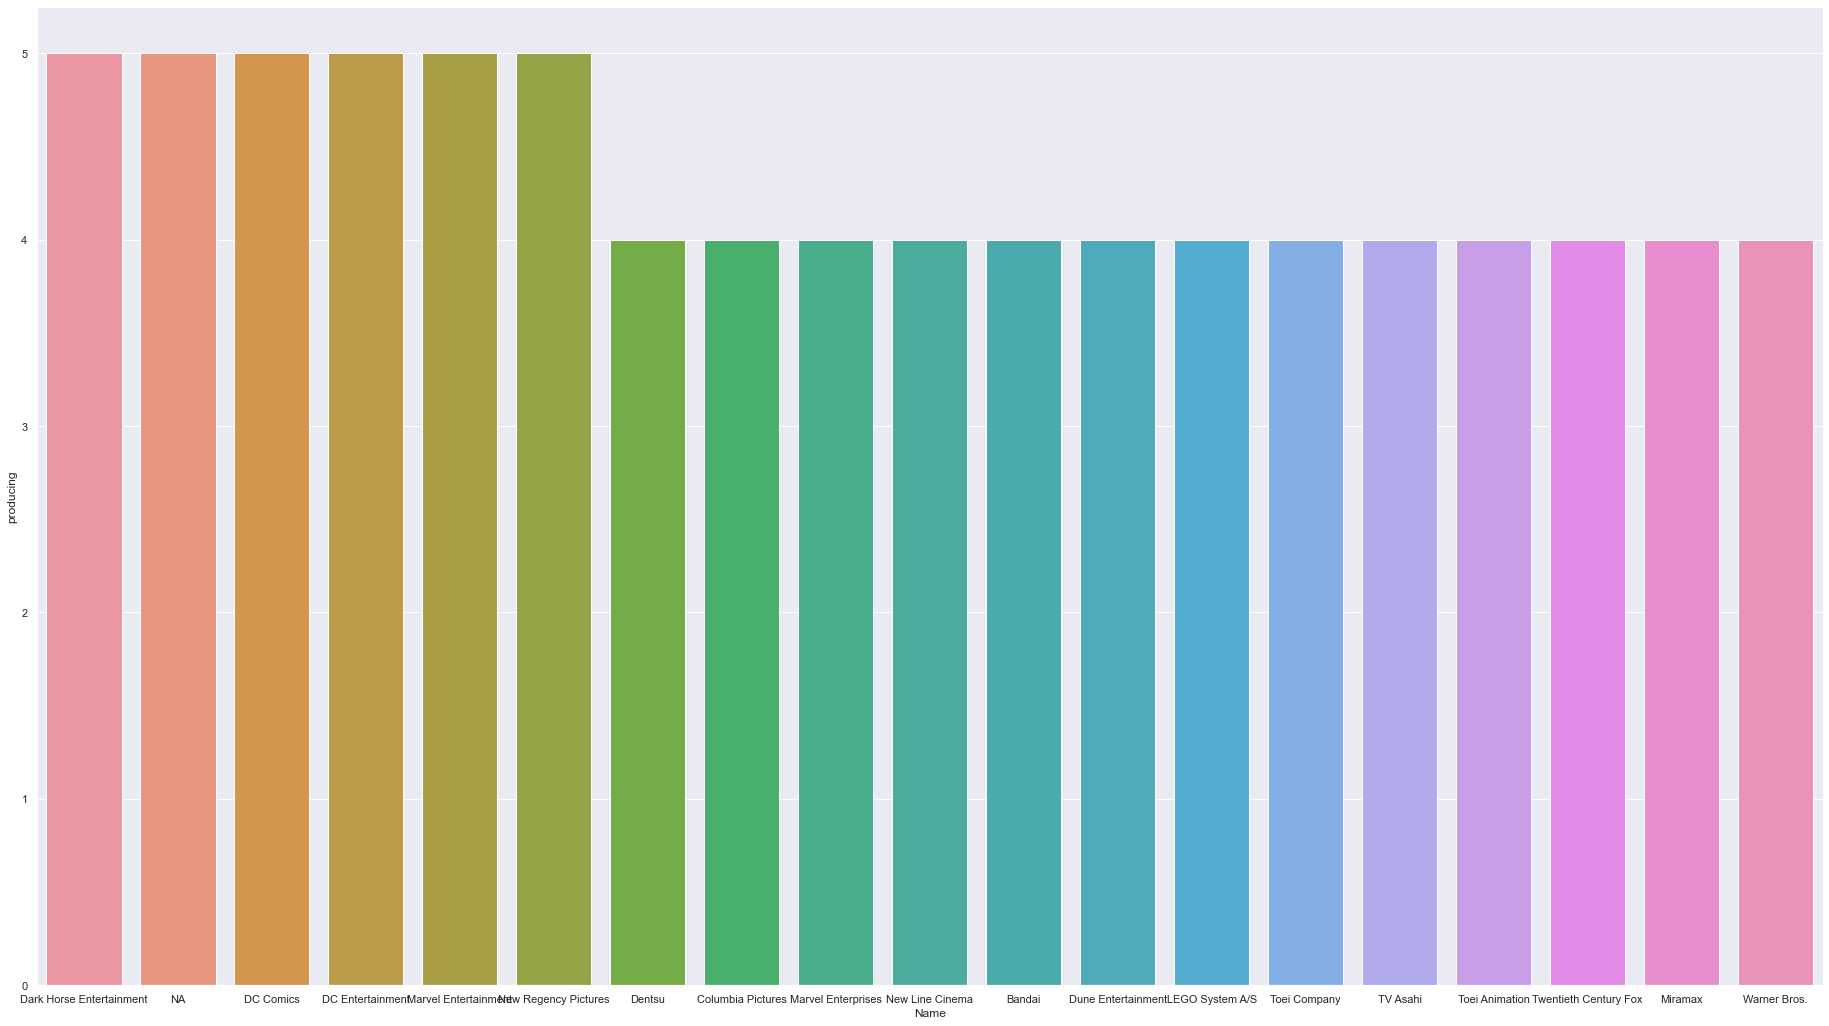

In [177]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit_transform(df[["Company1",
                    "Company2",
                    "Company3",
                    "Company4",
                    "Company5"]])
companyList = enc.categories_
allCompany = {}
for companies in companyList:
    for company in companies:
        if company not in allCompany:
            allCompany[company] = 1
        else:
            allCompany[company] = allCompany[company] + 1


allCompanydf = pd.DataFrame(list(allCompany.items()), columns=["Name","producing"])
sns.barplot(data=allCompanydf.sort_values("producing", ascending=False)[0:19], x="Name", y="producing")


- Casting in Hero movie

<AxesSubplot:xlabel='Name', ylabel='casting'>

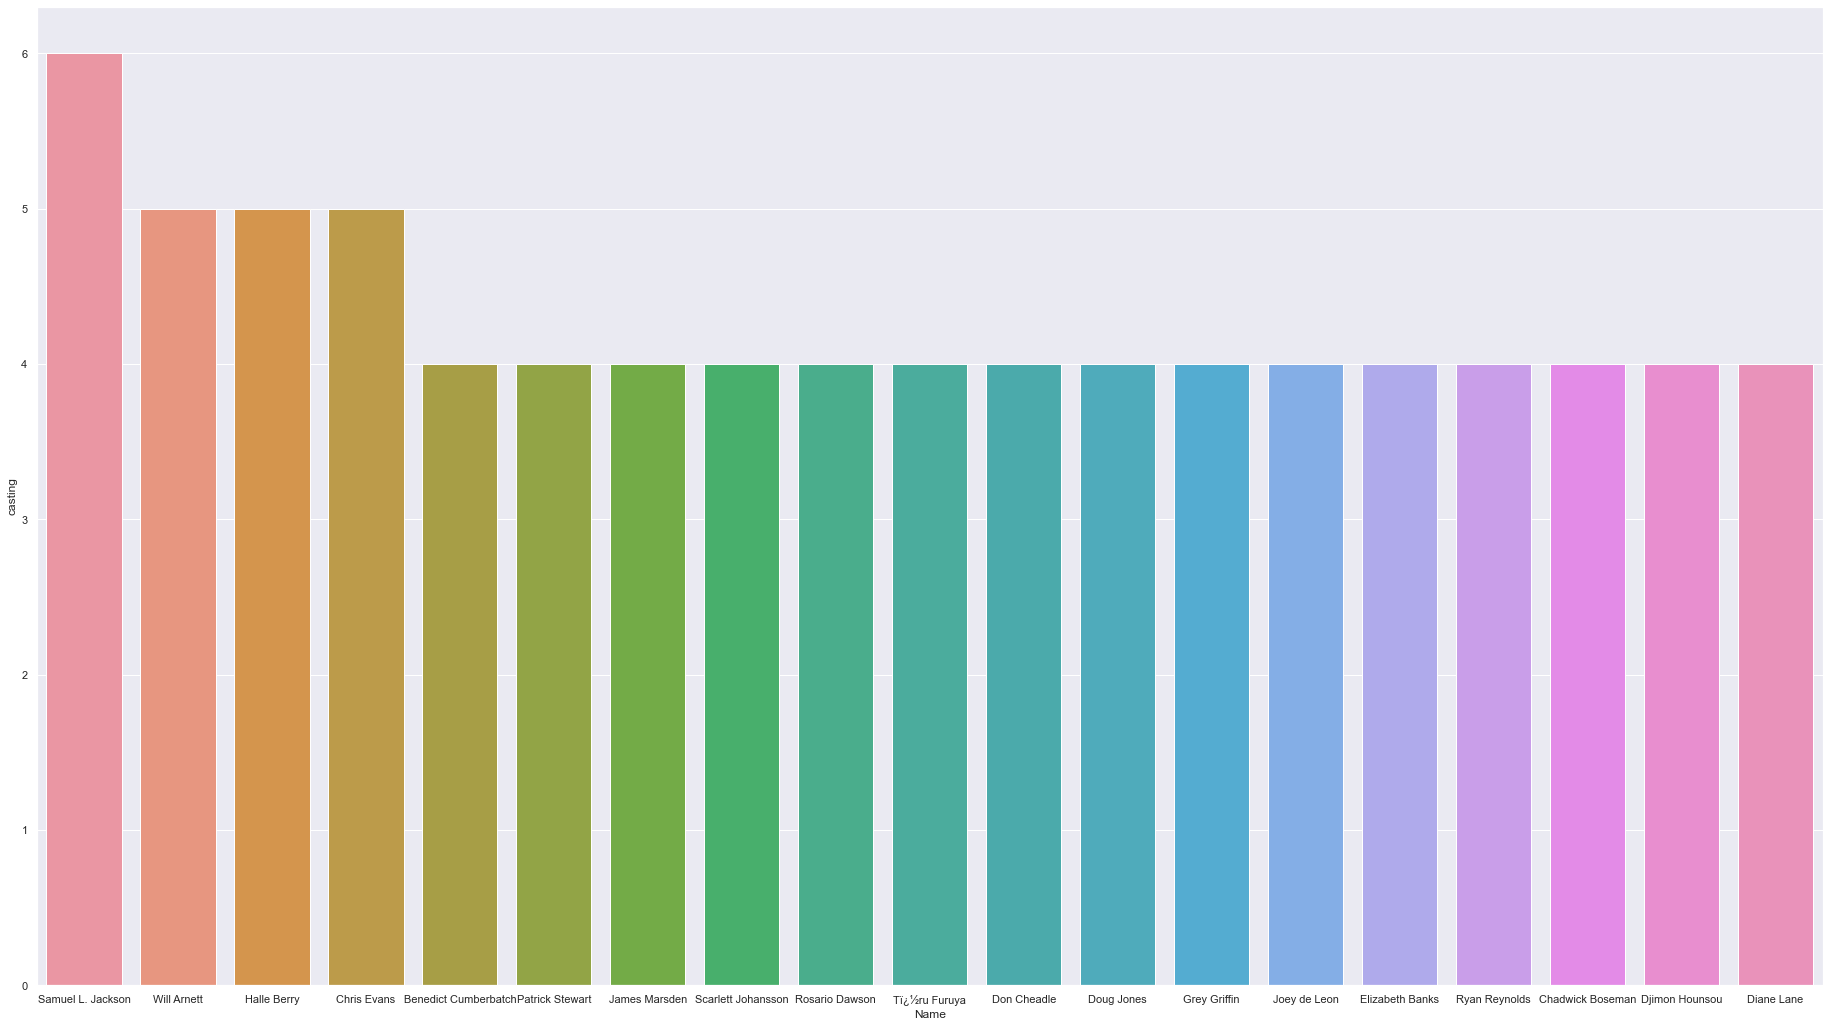

In [178]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit_transform(castdf)
castList = enc.categories_
allCasts = {}
for casts in castList:
    for cast in casts:
        if cast not in allCasts:
            allCasts[cast] = 1
        else:
            allCasts[cast] = allCasts[cast] + 1


allCastsdf = pd.DataFrame(list(allCasts.items()), columns=["Name","casting"])
sns.barplot(data=allCastsdf.sort_values("casting", ascending=False)[1:20], x="Name", y="casting")


> ## Lesson and learned 
> - Too many nulls in joined dataframe
> - too complex colnumns such as 'Genres', 'MPAARating'
> - How to use seaborn
> - How to use various chart forms by purpose
